## Denver Climate Change Analysis using Scikit-Learn: Multiple Linear Regression

###### By Martin Palkovic

#### In this notebook, I'll be taking a look at historical snowfall data in Denver, Colorado to see if we can make inferences about future annual snowfall in the city. The official weather station for the city of Denver is now located at Denver International Airport (DIA). However, most people consider this to be a poor representation of the weather in Denver proper - the airport sits 25 miles northeast of downtown Denver, and can sometimes experience vastly different weather than Denver and its suburbs. Furthermore, data from DIA only extends back 26 years. For these reasons, I'll be looking at data from Stapleton International Airport - Stapleton preceeded DIA, and is located much closer to downtown Denver. Data extends back to 1948, and the city still operates a weather station there.

##### Data from: <a>https://climate.colostate.edu/</a>

##### Import libraries

In [281]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set_style('dark')

##### Read the data in to a Pandas Dataframe:

In [282]:
df = pd.read_csv(r'/Users/martinpalkovic/Downloads/Stapleton_ClimateData_Annual.csv')
df.head()

,year,maxt,mint,pcpn,snow
0,1948,63.3,35.3,12.62,70.8
1,1949,63.2,36.1,16.78,61.0
2,1950,64.8,36.5,13.93,57.6
3,1951,61.5,35.2,19.43,95.0
4,1952,64.5,37.2,13.43,65.7


##### Clean the data:

In [283]:
df.rename(columns = {'maxt' : 'max_temp', 
                     'mint': 'min_temp', 'pcpn' : 'precipitation_in',
                     'snow': 'snowfall_in'}, inplace = True)

#df.replace({'snowfall_in' : {'T' : np.nan, 'M' : np.nan, '' : np.nan}}, inplace = True)
print(df.dtypes)
print(df.shape)
df.tail()

year                  int64
max_temp            float64
min_temp            float64
precipitation_in    float64
snowfall_in         float64
dtype: object
(73, 5)


,year,max_temp,min_temp,precipitation_in,snowfall_in
68,2016,67.5,38.1,11.17,58.2
69,2017,68.0,38.1,13.14,19.9
70,2018,66.5,37.5,11.62,26.7
71,2019,63.7,36.2,12.64,71.4
72,2020,70.3,41.0,8.63,40.6


##### This all looks good, no null data in the dataset, so we're good to go for modeling! Let's plot up historic snowfall data for Stapleton Airport from 1948-2020:

Text(1992, 22, 'Lowest Recorded Snowfall: 19" in 2017')

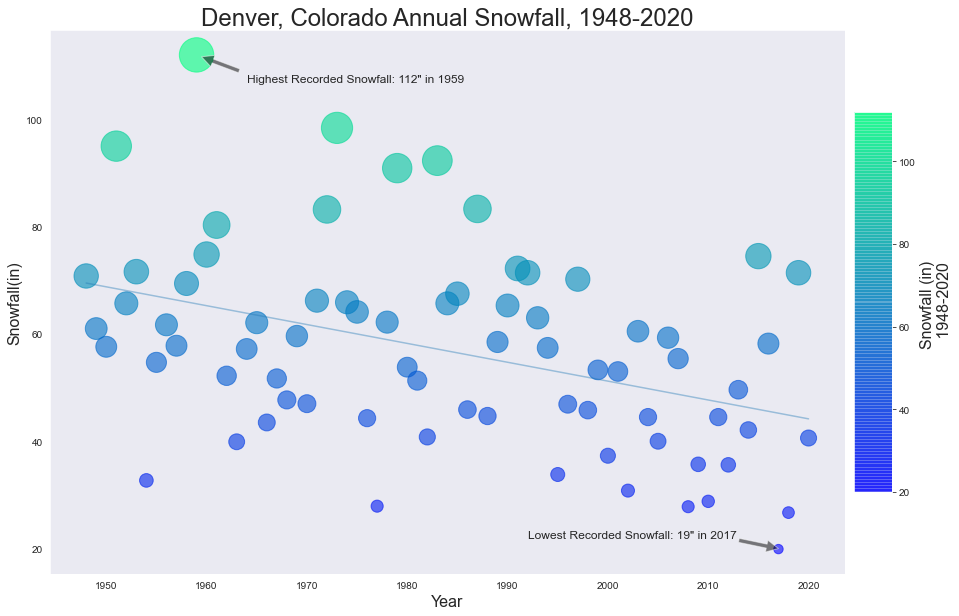

In [284]:
x = df['year']
y = df['snowfall_in']
smax = df.iloc[df[['snowfall_in']].idxmax()].astype('int').values.flatten().tolist()
smin = df.iloc[df[['snowfall_in']].idxmin()].astype('int').values.flatten().tolist()

area = [1*n**1.5 for n in y.to_numpy()]

fig, ax = plt.subplots(figsize = (16,10))
m,b = np.polyfit(x,y,1)
data = ax.scatter(x,y, s = area, c = df.snowfall_in, cmap = 'winter', alpha = 0.6)
ax.plot(x, m*x + b, alpha = 0.4)
ax.set_title('Denver, Colorado Annual Snowfall, 1948-2020', fontsize = 24)
ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Snowfall(in)', fontsize = 16)
clb = fig.colorbar(data, fraction = 0.1, shrink = 0.7, aspect = 10, pad = 0.01)
clb.set_label('Snowfall (in) \n 1948-2020', fontsize = 16)
#ax.legend()

ax.annotate('Highest Recorded Snowfall: ' + str(smax[4]) + "\" in " + str(smax[0]),
           xy = (smax[0], smax[4]), xytext = (smax[0] + 5, smax[4] -5),
           arrowprops = dict(facecolor = 'black', shrink = 0.1, alpha = 0.5),
           fontsize = 12)

ax.annotate('Lowest Recorded Snowfall: ' + str(smin[4]) + "\" in " + str(smin[0]),
           xy = (smin[0], smin[4] + 1), xytext = (smin[0] - 25, smin[4] + 3),
           arrowprops = dict(facecolor = 'black', alpha = 0.5),
           fontsize = 12)

##### It would definitely appear that Denver's winters are becoming drier, although annual snowfall does seem to have a high standard deviation...

##### Let's split our data into training and testing sets to train our linear regression model. First, I'll use a simple linear regression to predict temperatures for the range of 2020-2060, and then I'll feed those values into a multiple linear regression to predict snowfall for the same time period.

In [285]:
from sklearn.model_selection import train_test_split
x = df['year']
y = df['max_temp']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.28, random_state = 4)

In [286]:
from sklearn.linear_model import LinearRegression
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)
reg = LinearRegression().fit(x_train,y_train)
yhat = reg.predict(x_test)

In [287]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#print('Coefficients: \n', reg.coef_)
print('Mean Squared Error: %.2f' % mean_squared_error(y_test,yhat))
print('RMSE: %.2f' % np.sqrt(mean_squared_error(y_test,yhat)))
print('Mean Absolute Error: %.2f' % mean_absolute_error(y_test,yhat))
print('R2: %.2f' % r2_score(y_test,yhat))

Mean Squared Error: 2.88
RMSE: 1.70
Mean Absolute Error: 1.29
R2: -0.52


##### Graph annual max temperature vs year, with our tested model results shown as a red line:

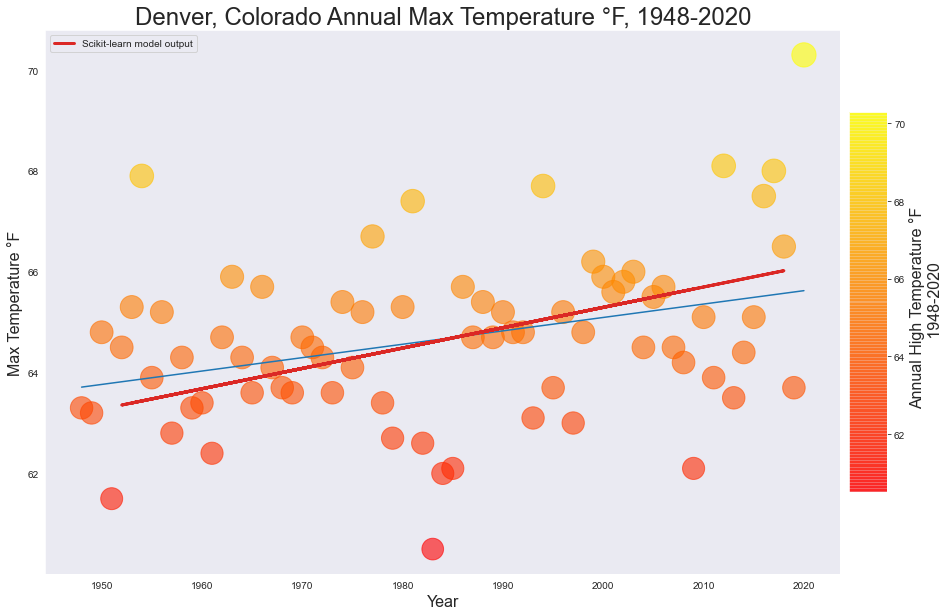

In [289]:
x = df['year']
y = df['max_temp']
area = [1*n**1.5 for n in y.to_numpy()]
m, b = np.polyfit(x,y,1)

fig, ax = plt.subplots(figsize = (16,10))
data = ax.scatter(x,y, s = area, c = df.max_temp, cmap = 'autumn', alpha = 0.6)
ax.plot(x, m*x + b) # original trendline
ax.plot(x_test, yhat, color = '#db2825', linewidth = 3, label = 'Scikit-learn model output') #modeled values

ax.set_title('Denver, Colorado Annual Max Temperature \N{DEGREE SIGN}F, 1948-2020', fontsize = 24)
ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Max Temperature \N{DEGREE SIGN}F', fontsize = 16)
clb = fig.colorbar(data, fraction = 0.1, shrink = 0.7, aspect = 10, pad = 0.01)
clb.set_label('Annual High Temperature \N{DEGREE SIGN}F  \n 1948-2020', fontsize = 16)
ax.legend(loc = 'upper left')

In [290]:
predicted_years = np.arange(2021,2061)
d = {'year': predicted_years,'pred_max_temp': np.nan}
df_f = pd.DataFrame(data = d)
#df = df.append(new_df)
print(df_f.shape)
df_f.head()

(40, 2)


,year,pred_max_temp
0,2021,NaN
1,2022,NaN
2,2023,NaN
3,2024,NaN
4,2025,NaN


In [292]:
xhat = np.arange(2061-len(df_f),2061).reshape(-1,1)
print(xhat.ndim)
#print(len(xhat))

2


In [293]:
yhat = reg.predict(xhat).round(2)

In [294]:
df_f['pred_max_temp'] = yhat
df_f.tail()

,year,pred_max_temp
35,2056,67.55
36,2057,67.59
37,2058,67.63
38,2059,67.68
39,2060,67.72


In [295]:
from sklearn.linear_model import LinearRegression
x = df[['year', 'max_temp']]
y = df['snowfall_in']

reg = LinearRegression().fit(x,y)

##### Do I need to compute any metrics here to quantitatively prove this works well? If so, what would you recommend?

In [302]:
print('Intercept: ', reg.intercept_)
print('Coefficients: ', reg.coef_)

Intercept:  809.6061135297095
Coefficients:  [-0.22840058 -4.63335306]


##### Annual Snowfall = intercept + (year coef * x1) + (max_temp coef * x2)

In [303]:
ylist = df_f['year'].values.flatten().tolist()
tlist = df_f['pred_max_temp'].values.flatten().tolist()
slist = []
def snow(x1, x2):
    return reg.intercept_ + (reg.coef_[0]* x1) + (reg.coef_[1] * x2)

for year, temp in zip(ylist, tlist):
    snowfall = snow(year,temp)
    #snowfall = reg.intercept_ +(reg.coef_ [0] * year) + (reg.coef_[1] * temp)
    slist.append(snowfall)

df_f['pred_avg_snowfall_in'] = slist
df_f.tail()

,year,pred_max_temp,pred_avg_snowfall_in,pred_snowfall_in
35,2056,67.55,27.031517,7.558252
36,2057,67.59,26.617782,34.152488
37,2058,67.63,26.204047,13.378193
38,2059,67.68,25.743979,6.589177
39,2060,67.72,25.330244,33.895355


##### Here, I'm going to generate some random points based on the current standard deviation for historic snowfall:

In [299]:
df.describe()

,year,max_temp,min_temp,precipitation_in,snowfall_in
count,73.000000,73.000000,73.000000,73.000000,73.000000
mean,1984.000000,64.668493,36.797260,15.325479,56.827397
std,21.217131,1.678862,1.422632,4.079781,18.245329
min,1948.000000,60.500000,34.000000,7.510000,19.900000
25%,1966.000000,63.600000,35.900000,12.520000,44.500000
50%,1984.000000,64.700000,36.600000,14.960000,57.400000
75%,2002.000000,65.500000,37.700000,17.450000,66.200000
max,2020.000000,70.300000,41.000000,25.140000,112.000000


In [300]:
n = len(df_f)
x1 = np.array(ylist)
x2 = np.array(tlist)
y_fit = curve(x1, x2)
noise = (np.std(df['snowfall_in'])*2.5) * (np.random.random(n) - 0.5) #I multiplied this by 2.5 because, visually, it seemed to approximate the spread of the data better
y_ran = y_fit + noise
df_f['pred_snowfall_in'] = y_ran

##### Finally, let's plot everything up:

Text(2030.0, 42.33024439561592, 'Annual Modeled Snowfall in 2060: 25" ')

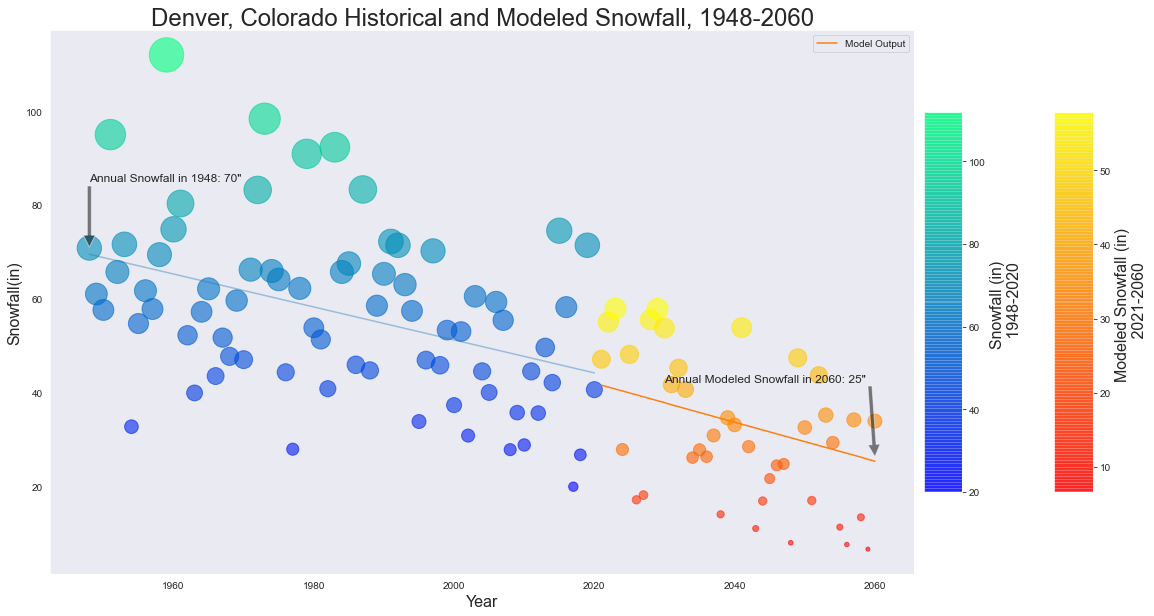

In [306]:
x = df['year']
y = df['snowfall_in']
x2 = df_f['year']
y2 = df_f['pred_avg_snowfall_in']
y3 = df_f['pred_snowfall_in']

smax = df.iloc[df[['snowfall_in']].idxmax()].astype('int').values.flatten().tolist()
smin = df.iloc[df[['snowfall_in']].idxmin()].astype('int').values.flatten().tolist()
s48 = df.loc[df['year'] == 1948].astype('int').values.flatten().tolist()
s_pred_min = df_f.loc[df_f['year'] == 2060].values.flatten().tolist()

area = [1*n**1.5 for n in y.to_numpy()]
area2 = [1*n**1.5 for n in y3.to_numpy()]

fig, ax = plt.subplots(figsize = (20,10))
m,b = np.polyfit(x,y,1)
hdata = ax.scatter(x,y, s = area, c = df.snowfall_in, cmap = 'winter', alpha = 0.6)
mdata = ax.scatter(x2,y_ran, s = area2, c= df_f.pred_snowfall_in, cmap = 'autumn', alpha = 0.6)

ax.plot(x, m*x + b, alpha = 0.4)
ax.plot(x2, y2, label = 'Model Output') #not sure what else to call this other than 'model output', I'm sure there is a better term, though...
ax.set_title('Denver, Colorado Historical and Modeled Snowfall, 1948-2060', fontsize = 24)
ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Snowfall(in)', fontsize = 16)
clbm = fig.colorbar(mdata, fraction = 0.1, shrink = 0.7, aspect = 10, pad = 0.03)
clbh = fig.colorbar(hdata, fraction = 0.1, shrink = 0.7, aspect = 10, pad = 0.01)
clbh.set_label('Snowfall (in) \n 1948-2020', fontsize = 16)
clbm.set_label('Modeled Snowfall (in) \n 2021-2060', fontsize = 16)
ax.legend()

ax.annotate('Annual Snowfall in ' + str(s48[0]) + ": " + str(s48[4]) + "\" ",
           xy = (s48[0], s48[4] + 1), xytext = (s48[0], s48[4] + 15),
           arrowprops = dict(facecolor = 'black', alpha = 0.5),
           fontsize = 12)

ax.annotate('Annual Modeled Snowfall in ' + str(int(s_pred_min[0])) + ": " + str(int(s_pred_min[2])) + "\" ",
            xy = (s_pred_min[0], s_pred_min[2] + 1), xytext = (s_pred_min[0] - 30, s_pred_min[2] + 17),
            arrowprops = dict(facecolor = 'black', alpha = 0.5),
            fontsize = 12)